In [14]:
# !pip install pyspark==3.1.1 py4j==0.10.9 
from pyspark.sql import SparkSession
import numpy as np

In [15]:
#create instance of spark class 
spark=SparkSession.builder.appName('Questions').getOrCreate()

In [16]:
spark

In [17]:
emp = spark.read.csv('employee.csv',header='true', 
                      inferSchema='true')
emp.show(5)

+-----------+----------+---------+--------------------+------------+----------+------+-------+----------+-------------+
|employee_id|first_name|last_name|               email|phone_number| hire_date|job_id| salary|manager_id|department_id|
+-----------+----------+---------+--------------------+------------+----------+------+-------+----------+-------------+
|        100|    Steven|     King|steven.king@sqltu...|515.123.4567|1987-06-17|     4|24000.0|      null|            9|
|        101|     Neena|  Kochhar|neena.kochhar@sql...|515.123.4568|1989-09-21|     5|17000.0|     100.0|            9|
|        102|       Lex|   DeHaan|lex.dehaan@sqltut...|515.123.4569|1993-01-13|     5|17000.0|     100.0|            9|
|        103| Alexander|   Hunold|alexander.hunold@...|590.423.4567|1990-01-03|     9| 9000.0|     102.0|            6|
|        104|     Bruce|    Ernst|bruce.ernst@sqltu...|590.423.4568|1991-05-21|     9| 6000.0|     103.0|            6|
+-----------+----------+---------+------

In [18]:
dept = spark.read.csv('department.csv',header='true', 
                      inferSchema='true')
dept.show(5)

+-------------+---------------+-----------+
|department_id|department_name|location_id|
+-------------+---------------+-----------+
|            1| Administration|       1700|
|            2|      Marketing|       1800|
|            3|     Purchasing|       1700|
|            4|Human Resources|       2400|
|            5|       Shipping|       1500|
+-------------+---------------+-----------+
only showing top 5 rows



In [19]:
location = spark.read.csv('location.csv',header='true', 
                      inferSchema='true')
location.show(5)

+-----------+-------------------+-----------+-------------------+--------------+----------+
|location_id|     street_address|postal_code|               city|state_province|country_id|
+-----------+-------------------+-----------+-------------------+--------------+----------+
|       1400|2014 Jabberwocky Rd|      26192|          Southlake|         Texas|        US|
|       1500|2011 Interiors Blvd|      99236|South San Francisco|    California|        US|
|       1700|    2004 Charade Rd|      98199|            Seattle|    Washington|        US|
|       1800|    147 Spadina Ave|    M5V 2L7|            Toronto|       Ontario|        CA|
|       2400|     8204 Arthur St|       null|             London|          null|        UK|
+-----------+-------------------+-----------+-------------------+--------------+----------+
only showing top 5 rows



In [20]:
countries = spark.read.csv('country.csv',header='true', 
                      inferSchema='true')
countries.show(5)

+----------+------------+---------+
|country_id|country_name|region_id|
+----------+------------+---------+
|        AR|   Argentina|        2|
|        AU|   Australia|        3|
|        BE|     Belgium|        1|
|        BR|      Brazil|        2|
|        CA|      Canada|        2|
+----------+------------+---------+
only showing top 5 rows



**1. Get list of employess along with their department details**

In [21]:
emp_dept =  emp.join(dept,emp["department_id"] ==  dept["department_id"],"left")
emp_dept.show(5)

+-----------+----------+---------+--------------------+------------+----------+------+-------+----------+-------------+-------------+---------------+-----------+
|employee_id|first_name|last_name|               email|phone_number| hire_date|job_id| salary|manager_id|department_id|department_id|department_name|location_id|
+-----------+----------+---------+--------------------+------------+----------+------+-------+----------+-------------+-------------+---------------+-----------+
|        100|    Steven|     King|steven.king@sqltu...|515.123.4567|1987-06-17|     4|24000.0|      null|            9|            9|      Executive|       1700|
|        101|     Neena|  Kochhar|neena.kochhar@sql...|515.123.4568|1989-09-21|     5|17000.0|     100.0|            9|            9|      Executive|       1700|
|        102|       Lex|   DeHaan|lex.dehaan@sqltut...|515.123.4569|1993-01-13|     5|17000.0|     100.0|            9|            9|      Executive|       1700|
|        103| Alexander|   H

**2. Analysis Employee Department**

In [22]:
from pyspark.sql import functions as f

In [ ]:
emp_dept.groupBy('department_name').agg(f.sum('salary').alias('total salary'),
                                       f.count('location_id').alias('location count'),
                                       f.countDistinct('job_id').alias('unique job id count')).show()

In [24]:
emp_dept.groupBy('department_name').count().show()

+----------------+-----+
| department_name|count|
+----------------+-----+
|           Sales|    6|
|      Accounting|    2|
|         Finance|    6|
|Public Relations|    1|
|       Executive|    3|
|      Purchasing|    6|
|       Marketing|    2|
|              IT|    5|
|  Administration|    1|
|        Shipping|    7|
| Human Resources|    1|
+----------------+-----+



In [25]:
department_count = emp_dept.select('department_name').toPandas()
department_count.head()

,department_name
0,Executive
1,Executive
2,Executive
3,IT
4,IT


In [26]:
a1=emp_dept.filter(f.col('job_id')==5).toPandas()
a1

,employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id,department_id,department_name,location_id
0,101,Neena,Kochhar,neena.kochhar@sqltutorial.org,515.123.4568,1989-09-21,5,17000.0,100.0,9,9,Executive,1700
1,102,Lex,DeHaan,lex.dehaan@sqltutorial.org,515.123.4569,1993-01-13,5,17000.0,100.0,9,9,Executive,1700


In [27]:
type(emp_dept)

pyspark.sql.dataframe.DataFrame

In [28]:
emp_dept.columns

['employee_id',
 'first_name',
 'last_name',
 'email',
 'phone_number',
 'hire_date',
 'job_id',
 'salary',
 'manager_id',
 'department_id',
 'department_id',
 'department_name',
 'location_id']

In [29]:
emp_dept.select(f.col('department_name'), f.col('job_id')).show(5)

+---------------+------+
|department_name|job_id|
+---------------+------+
|      Executive|     4|
|      Executive|     5|
|      Executive|     5|
|             IT|     9|
|             IT|     9|
+---------------+------+
only showing top 5 rows



In [30]:
k1 = emp_dept.groupby('department_name').agg(f.count('department_name').alias('department_count')).toPandas()

In [31]:
k1

,department_name,department_count
0,Sales,6
1,Accounting,2
2,Finance,6
3,Public Relations,1
4,Executive,3
5,Purchasing,6
6,Marketing,2
7,IT,5
8,Administration,1
9,Shipping,7


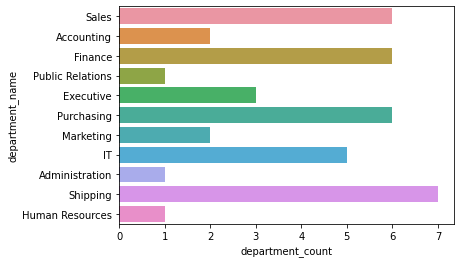

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(y='department_name',x='department_count',data=k1)
plt.show()

**Conclusion**

* Majority of employess(around 17.5%) work in Shipping Department
* Administration, Human Resources and Public Relations are Departments having least number of Employees working
* Finance, Sales and Purchasing departments have equal percentage of employees employeed 

**3. Get Address of Administration and Marketing Department**

In [33]:
department_locations = dept.join(location,dept["location_id"] ==  location["location_id"],"left")

In [34]:
countries_department_locations = department_locations.join(countries,department_locations["country_id"] ==  countries["country_id"],"left")
countries_department_locations.show(1)

+-------------+---------------+-----------+-----------+---------------+-----------+-------+--------------+----------+----------+--------------------+---------+
|department_id|department_name|location_id|location_id| street_address|postal_code|   city|state_province|country_id|country_id|        country_name|region_id|
+-------------+---------------+-----------+-----------+---------------+-----------+-------+--------------+----------+----------+--------------------+---------+
|            1| Administration|       1700|       1700|2004 Charade Rd|      98199|Seattle|    Washington|        US|        US|United States of ...|        2|
+-------------+---------------+-----------+-----------+---------------+-----------+-------+--------------+----------+----------+--------------------+---------+
only showing top 1 row



**4. Get Employees who work in USA as Administration department**

In [35]:
employees_department_locations = emp.join(countries_department_locations,emp["department_id"] ==  countries_department_locations["department_id"],"left")
employees_department_locations.show(1)

+-----------+----------+---------+--------------------+------------+----------+------+------+----------+-------------+-------------+---------------+-----------+-----------+---------------+-----------+-------+--------------+----------+----------+--------------------+---------+
|employee_id|first_name|last_name|               email|phone_number| hire_date|job_id|salary|manager_id|department_id|department_id|department_name|location_id|location_id| street_address|postal_code|   city|state_province|country_id|country_id|        country_name|region_id|
+-----------+----------+---------+--------------------+------------+----------+------+------+----------+-------------+-------------+---------------+-----------+-----------+---------------+-----------+-------+--------------+----------+----------+--------------------+---------+
|        200|  Jennifer|   Whalen|jennifer.whalen@s...|515.123.4444|1987-09-17|     3|4400.0|     101.0|            1|            1| Administration|       1700|       17

**5. How many employees work in Canada ?**

In [36]:
employees_department_locations.collect()

[Row(employee_id=200, first_name='Jennifer', last_name='Whalen', email='jennifer.whalen@sqltutorial.org', phone_number='515.123.4444', hire_date='1987-09-17', job_id=3, salary=4400.0, manager_id=101.0, department_id=1, department_id=1, department_name='Administration', location_id=1700, location_id=1700, street_address='2004 Charade Rd', postal_code='98199', city='Seattle', state_province='Washington', country_id='US', country_id='US', country_name='United States of America', region_id=2),
 Row(employee_id=103, first_name='Alexander', last_name='Hunold', email='alexander.hunold@sqltutorial.org', phone_number='590.423.4567', hire_date='1990-01-03', job_id=9, salary=9000.0, manager_id=102.0, department_id=6, department_id=6, department_name='IT', location_id=1400, location_id=1400, street_address='2014 Jabberwocky Rd', postal_code='26192', city='Southlake', state_province='Texas', country_id='US', country_id='US', country_name='United States of America', region_id=2),
 Row(employee_id=10

In [37]:
employees_department_locations.groupBy('country_name').count().show()


+--------------------+-----+
|        country_name|count|
+--------------------+-----+
|             Germany|    1|
|United States of ...|   30|
|              Canada|    2|
|      United Kingdom|    7|
+--------------------+-----+



**Only two people works in canada**

**6. Get Complete Address of Employees**

In [38]:
employees_department_locations.printSchema()

root
 |-- employee_id: integer (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- email: string (nullable = true)
 |-- phone_number: string (nullable = true)
 |-- hire_date: string (nullable = true)
 |-- job_id: integer (nullable = true)
 |-- salary: double (nullable = true)
 |-- manager_id: double (nullable = true)
 |-- department_id: integer (nullable = true)
 |-- department_id: integer (nullable = true)
 |-- department_name: string (nullable = true)
 |-- location_id: integer (nullable = true)
 |-- location_id: integer (nullable = true)
 |-- street_address: string (nullable = true)
 |-- postal_code: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state_province: string (nullable = true)
 |-- country_id: string (nullable = true)
 |-- country_id: string (nullable = true)
 |-- country_name: string (nullable = true)
 |-- region_id: integer (nullable = true)



In [39]:
from pyspark.sql.functions import concat , col , lit
import pandas as pd
# pd.set_option('display.width', 50000)

h=employees_department_locations.withColumn("Address",
                                          concat(col("street_address"), lit(","),
                                          col("city"), lit(","),
                                          col("postal_code"), lit(","),
                                          col("state_province") , lit(","), 
                                          col("country_name"))).select('Address').toPandas()
h

,Address
0,"2004 Charade Rd,Seattle,98199,Washington,Unite..."
1,"2014 Jabberwocky Rd,Southlake,26192,Texas,Unit..."
2,"2014 Jabberwocky Rd,Southlake,26192,Texas,Unit..."
3,"2014 Jabberwocky Rd,Southlake,26192,Texas,Unit..."
4,"2014 Jabberwocky Rd,Southlake,26192,Texas,Unit..."
5,"2014 Jabberwocky Rd,Southlake,26192,Texas,Unit..."
6,"2004 Charade Rd,Seattle,98199,Washington,Unite..."
7,"2004 Charade Rd,Seattle,98199,Washington,Unite..."
8,"2004 Charade Rd,Seattle,98199,Washington,Unite..."
9,"2004 Charade Rd,Seattle,98199,Washington,Unite..."


**7. Convert Employee's First name and last name to lower case letters and concatinate them**

In [40]:
def convertCase(string):
    return string.lower()

In [41]:
from pyspark.sql.functions import udf , StringType
convertUDF = udf(lambda z: convertCase(z),StringType())

In [42]:
emp.select(convertUDF(col("first_name")).alias("first_name"), convertUDF(col("last_name")).alias("last_name")).withColumn("Name",
                                                                                                                           concat(col("first_name"), lit(" "),
                                                                                                                                  col("last_name"))).select('Name').show()

Py4JJavaError: An error occurred while calling o228.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 102.0 failed 1 times, most recent failure: Lost task 0.0 in stage 102.0 (TID 1582) (CINT-IAOW-032.CISIVE-INT.LOCAL executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:182)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:107)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:119)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:145)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec.evaluate(BatchEvalPythonExec.scala:81)
	at org.apache.spark.sql.execution.python.EvalPythonExec.$anonfun$doExecute$2(EvalPythonExec.scala:130)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:863)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:863)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(Unknown Source)
	at java.net.AbstractPlainSocketImpl.accept(Unknown Source)
	at java.net.PlainSocketImpl.accept(Unknown Source)
	at java.net.ServerSocket.implAccept(Unknown Source)
	at java.net.ServerSocket.accept(Unknown Source)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:174)
	... 24 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2258)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2207)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2206)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1079)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2445)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2387)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2376)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2196)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2217)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2236)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:472)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:425)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:47)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:3696)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:2722)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3687)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:775)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3685)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2722)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2929)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:301)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:338)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:182)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:107)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:119)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:145)
	at org.apache.spark.sql.execution.python.BatchEvalPythonExec.evaluate(BatchEvalPythonExec.scala:81)
	at org.apache.spark.sql.execution.python.EvalPythonExec.$anonfun$doExecute$2(EvalPythonExec.scala:130)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:863)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:863)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(Unknown Source)
	at java.net.AbstractPlainSocketImpl.accept(Unknown Source)
	at java.net.PlainSocketImpl.accept(Unknown Source)
	at java.net.ServerSocket.implAccept(Unknown Source)
	at java.net.ServerSocket.accept(Unknown Source)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:174)
	... 24 more


**8. Get Hightest paid jobs**

In [ ]:
int(employees_department_locations.select(max('salary')).collect()[0][0])

In [ ]:
from pyspark.sql import functions as f
p2 = employees_department_locations.select('salary').agg(f.percentile_approx('salary',[0.5, 0.7, 0.9,0.99]).alias('percentiles')).toPandas()
p2

In [ ]:
p2['percentiles'].explode()

In [ ]:
data = employees_department_locations.select('*')

In [ ]:
data

In [ ]:
from pyspark.sql import SQLContext
data.registerTempTable("data")
sql_context = SQLContext(spark)
sql_context.sql(f"SELECT department_name from data WHERE salary == {employees_department_locations.select(max('salary'))".collect()[0][0]}).collect()[0][0]

Hightest paid job is Executive